In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import glob
from PIL import Image
import glob

all_images = []
all_labels = []
img_size = (96, 96)
# for f in glob.glob('c://workspace//Data//Foods//**//*.jpg', recursive = True):
for f in glob.glob('c:\\workspace\\Data\\Foods\\**\\*.jpg', recursive = True):    
    # arr = f.split('//')
    arr = f.split('\\')
    img = Image.open(f)
    img_resize = img.resize((img_size[0], img_size[1]))
    all_images.append(img_resize)
    label = 0
    if arr[5] == 'Chicken':
        label = 0
    elif arr[5] == 'Dolsot':
        label = 1
    elif arr[5] == 'Jeyug':
        label = 2
    elif arr[5] == 'Kimchi':
        label = 3
    elif arr[5] == 'Samgyeob':
        label = 4
    elif arr[5] == 'Soybean':
        label = 5
    all_labels.append(label)
    

In [3]:
all_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [4]:
import numpy as np

x = np.empty((1, img_size[0], img_size[1], 3))
for img in all_images:
    x = np.vstack((x, np.array(img).reshape(1, img_size[0], img_size[1], 3)))

x.shape

(239, 96, 96, 3)

In [5]:
x = np.delete(x, (0), axis=0)
x.shape

(238, 96, 96, 3)

In [6]:
y = np.array(all_labels)
y[150:160]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

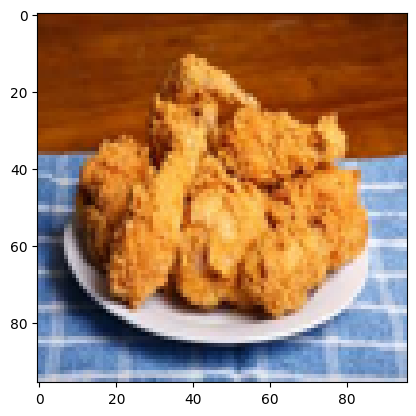

In [7]:
import matplotlib.pyplot as plt
plt.imshow(all_images[0])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.2, stratify=y, shuffle=True, random_state=0)
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((190, 96, 96, 3), (48, 96, 96, 3), (190,), (48,))

In [22]:
import pandas as pd
pd.DataFrame(y_tr).value_counts()

0    40
1    32
3    32
5    32
2    30
4    24
Name: count, dtype: int64

In [25]:
x_tr[0]

array([[[245., 245., 245.],
        [245., 245., 245.],
        [246., 246., 246.],
        ...,
        [246., 246., 246.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[245., 245., 245.],
        [246., 246., 246.],
        [246., 246., 246.],
        ...,
        [245., 246., 245.],
        [245., 246., 246.],
        [246., 246., 246.]],

       [[246., 246., 246.],
        [245., 247., 246.],
        [245., 247., 246.],
        ...,
        [245., 246., 246.],
        [245., 246., 245.],
        [245., 246., 246.]],

       ...,

       [[244., 245., 244.],
        [234., 234., 236.],
        [214., 206., 204.],
        ...,
        [116., 114., 117.],
        [ 50.,  37.,  35.],
        [ 87.,  71.,  53.]],

       [[212., 208., 211.],
        [209., 202., 202.],
        [207., 201., 199.],
        ...,
        [ 69.,  57.,  46.],
        [ 78.,  64.,  49.],
        [ 99.,  85.,  70.]],

       [[177., 161., 163.],
        [207., 202., 200.],
        [220., 2

In [26]:
# x_tr = x_tr.reshape(-1, img_size[0]*img_size[1]*3)
# x_ts = x_ts.reshape(-1, img_size[0]*img_size[1]*3)
# print(x_tr.shape)

x_tr = x_tr / 255.
x_ts = x_ts / 255.

# x_tr = x_tr.reshape(-1, img_size[0], img_size[1], 3)
# x_ts = x_ts.reshape(-1, img_size[0], img_size[1], 3)
# print(x_tr.shape)
print(y_tr[:10])

[3 5 1 4 3 1 4 2 4 3]


In [27]:
x_tr[0]

array([[[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96470588, 0.96470588, 0.96470588],
        ...,
        [0.96470588, 0.96470588, 0.96470588],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431]],

       [[0.96078431, 0.96078431, 0.96078431],
        [0.96470588, 0.96470588, 0.96470588],
        [0.96470588, 0.96470588, 0.96470588],
        ...,
        [0.96078431, 0.96470588, 0.96078431],
        [0.96078431, 0.96470588, 0.96470588],
        [0.96470588, 0.96470588, 0.96470588]],

       [[0.96470588, 0.96470588, 0.96470588],
        [0.96078431, 0.96862745, 0.96470588],
        [0.96078431, 0.96862745, 0.96470588],
        ...,
        [0.96078431, 0.96470588, 0.96470588],
        [0.96078431, 0.96470588, 0.96078431],
        [0.96078431, 0.96470588, 0.96470588]],

       ...,

       [[0.95686275, 0.96078431, 0.95686275],
        [0.91764706, 0.91764706, 0.9254902 ],
        [0.83921569, 0

In [28]:
from tensorflow.keras import utils
y_tr_backup = y_tr
y_ts_backup = y_ts

y_tr = utils.to_categorical(y_tr, 6)
y_ts = utils.to_categorical(y_ts, 6)

y_tr[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [29]:
x_tr.shape[1:], x_tr.shape

((96, 96, 3), (190, 96, 96, 3))

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same", input_shape=x_tr.shape[1:],activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="tanh"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation="tanh"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(6,activation="softmax"))          
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 7056)             

In [73]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("c:/workspace/Data/result/food_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
hist = model.fit(x_tr, y_tr, batch_size=32, validation_split=0.2, epochs=100, callbacks=[checkpoint])


Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 6.8474 - accuracy: 0.2105
Epoch 1: val_accuracy improved from -inf to 0.28947, saving model to c:/workspace/Data/result\food_best.h5
5/5 [==============================] - 3s 175ms/step - loss: 6.8474 - accuracy: 0.2105 - val_loss: 2.7538 - val_accuracy: 0.2895
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 2.1193 - accuracy: 0.1711
Epoch 2: val_accuracy improved from 0.28947 to 0.34211, saving model to c:/workspace/Data/result\food_best.h5
5/5 [==============================] - 0s 51ms/step - loss: 2.1193 - accuracy: 0.1711 - val_loss: 1.7599 - val_accuracy: 0.3421
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 1.7792 - accuracy: 0.1776
Epoch 3: val_accuracy did not improve from 0.34211
5/5 [==============================] - 0s 41ms/step - loss: 1.7792 - accuracy: 0.1776 - val_loss: 1.7539 - val_accuracy: 0.2368
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 1

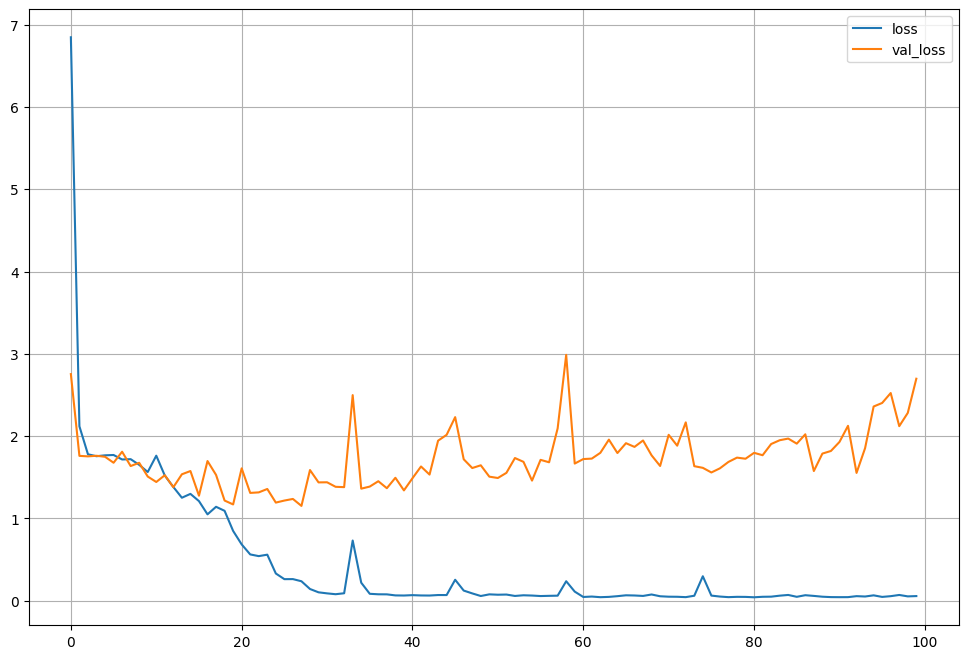

In [74]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()


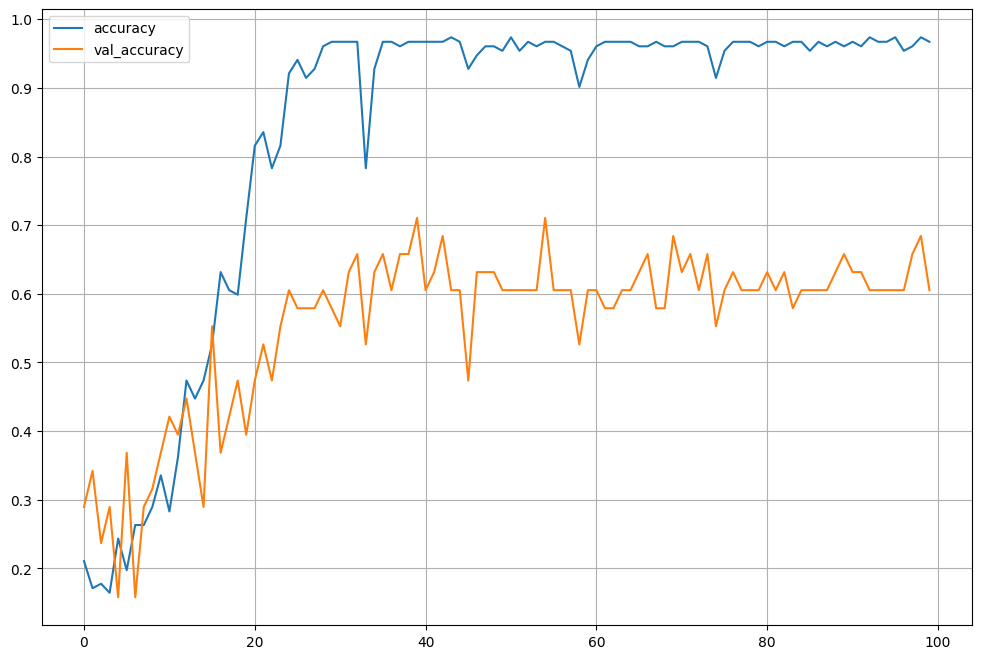

In [75]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()


In [76]:
from tensorflow.keras.models import load_model
model = load_model('c:/workspace/Data/result/food_best.h5')
scores = model.evaluate(x_tr, y_tr, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(x_ts, y_ts, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용



6/6 [==============================] - 0s 51ms/step - loss: 0.3108 - accuracy: 0.9211
[0.3107524812221527, 0.9210526347160339]
accuracy: 92.11%
2/2 [==============================] - 0s 94ms/step - loss: 1.1011 - accuracy: 0.6667
[1.10114324092865, 0.6666666865348816]
accuracy: 66.67%


In [77]:
pred=model.predict(x_ts)
np.argmax(pred,axis=1)


2/2 [==============================] - 0s 9ms/step


array([3, 1, 3, 3, 0, 4, 1, 2, 0, 5, 1, 3, 4, 3, 3, 2, 2, 3, 0, 0, 3, 5,
       0, 1, 5, 0, 1, 1, 0, 5, 1, 2, 3, 1, 5, 4, 4, 0, 3, 2, 1, 1, 3, 0,
       0, 5, 3, 3], dtype=int64)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_backup, np.argmax(pred,axis=1)))


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.88      0.78         8
           2       0.80      0.50      0.62         8
           3       0.54      0.88      0.67         8
           4       0.50      0.33      0.40         6
           5       0.83      0.62      0.71         8

    accuracy                           0.67        48
   macro avg       0.68      0.65      0.65        48
weighted avg       0.69      0.67      0.66        48



================================================================= reshape하고 다시

In [38]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.2, stratify=y, shuffle=True, random_state=0)
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((190, 96, 96, 3), (48, 96, 96, 3), (190,), (48,))

In [39]:
x_tr[0]

array([[[245., 245., 245.],
        [245., 245., 245.],
        [246., 246., 246.],
        ...,
        [246., 246., 246.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[245., 245., 245.],
        [246., 246., 246.],
        [246., 246., 246.],
        ...,
        [245., 246., 245.],
        [245., 246., 246.],
        [246., 246., 246.]],

       [[246., 246., 246.],
        [245., 247., 246.],
        [245., 247., 246.],
        ...,
        [245., 246., 246.],
        [245., 246., 245.],
        [245., 246., 246.]],

       ...,

       [[244., 245., 244.],
        [234., 234., 236.],
        [214., 206., 204.],
        ...,
        [116., 114., 117.],
        [ 50.,  37.,  35.],
        [ 87.,  71.,  53.]],

       [[212., 208., 211.],
        [209., 202., 202.],
        [207., 201., 199.],
        ...,
        [ 69.,  57.,  46.],
        [ 78.,  64.,  49.],
        [ 99.,  85.,  70.]],

       [[177., 161., 163.],
        [207., 202., 200.],
        [220., 2

In [40]:
x_tr = x_tr.reshape(-1, img_size[0]*img_size[1]*3)
x_ts = x_ts.reshape(-1, img_size[0]*img_size[1]*3)
print(x_tr.shape)
print(x_tr[0])

x_tr = x_tr / 255.
x_ts = x_ts /255.

print(x_tr[0])
x_tr = x_tr.reshape(-1, img_size[0], img_size[1], 3)
x_ts = x_ts.reshape(-1, img_size[0], img_size[1], 3)
print(x_tr.shape)
print(y_tr[:10])

(190, 27648)
[245. 245. 245. ...  95.  84.  68.]
[0.96078431 0.96078431 0.96078431 ... 0.37254902 0.32941176 0.26666667]
(190, 96, 96, 3)
[3 5 1 4 3 1 4 2 4 3]


In [41]:
x_tr[0]

array([[[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96470588, 0.96470588, 0.96470588],
        ...,
        [0.96470588, 0.96470588, 0.96470588],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431]],

       [[0.96078431, 0.96078431, 0.96078431],
        [0.96470588, 0.96470588, 0.96470588],
        [0.96470588, 0.96470588, 0.96470588],
        ...,
        [0.96078431, 0.96470588, 0.96078431],
        [0.96078431, 0.96470588, 0.96470588],
        [0.96470588, 0.96470588, 0.96470588]],

       [[0.96470588, 0.96470588, 0.96470588],
        [0.96078431, 0.96862745, 0.96470588],
        [0.96078431, 0.96862745, 0.96470588],
        ...,
        [0.96078431, 0.96470588, 0.96470588],
        [0.96078431, 0.96470588, 0.96078431],
        [0.96078431, 0.96470588, 0.96470588]],

       ...,

       [[0.95686275, 0.96078431, 0.95686275],
        [0.91764706, 0.91764706, 0.9254902 ],
        [0.83921569, 0

In [42]:
from tensorflow.keras import utils
y_tr_backup = y_tr
y_ts_backup = y_ts

y_tr = utils.to_categorical(y_tr, 6)
y_ts = utils.to_categorical(y_ts, 6)

y_tr[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [43]:
x_tr.shape[1:], x_tr.shape    # (96, 96, 3)

((96, 96, 3), (190, 96, 96, 3))

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same", input_shape=x_tr.shape[1:],activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="tanh"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation="tanh"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(6,activation="softmax"))          
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 7056)             

In [14]:
import tensorflow as tf

# Place a tensor on GPU
with tf.device('/device:GPU:0'):
    gpu_tensor = tf.Variable([1.0, 2.0, 3.0])

# # Place a tensor on CPU
# with tf.device('/device:CPU:0'):
#     cpu_tensor = tf.Variable([4.0, 5.0, 6.0])


In [45]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("c:/workspace/Data/result/food_best2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
hist = model.fit(x_tr, y_tr, batch_size=64, validation_split=0.2, epochs=100, callbacks=[checkpoint])


Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.9834 - accuracy: 0.1711
Epoch 1: val_accuracy improved from -inf to 0.13158, saving model to c:/workspace/Data/result\food_best2.h5
3/3 [==============================] - 2s 315ms/step - loss: 1.9834 - accuracy: 0.1711 - val_loss: 6.3004 - val_accuracy: 0.1316
Epoch 2/100
2/3 [===================>..........] - ETA: 0s - loss: 5.9148 - accuracy: 0.1250
Epoch 2: val_accuracy improved from 0.13158 to 0.26316, saving model to c:/workspace/Data/result\food_best2.h5
3/3 [==============================] - 0s 79ms/step - loss: 5.7519 - accuracy: 0.1184 - val_loss: 3.8839 - val_accuracy: 0.2632
Epoch 3/100
2/3 [===================>..........] - ETA: 0s - loss: 3.3059 - accuracy: 0.1797
Epoch 3: val_accuracy did not improve from 0.26316
3/3 [==============================] - 0s 60ms/step - loss: 3.1063 - accuracy: 0.1842 - val_loss: 1.7361 - val_accuracy: 0.1842
Epoch 4/100
2/3 [===================>..........] - ETA: 0s - loss:

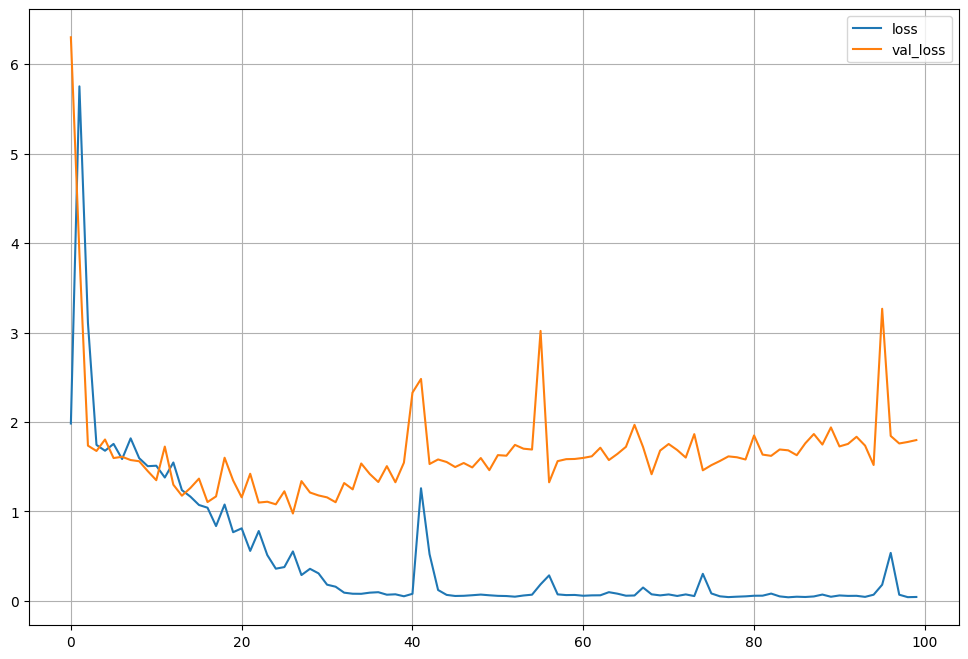

In [46]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()


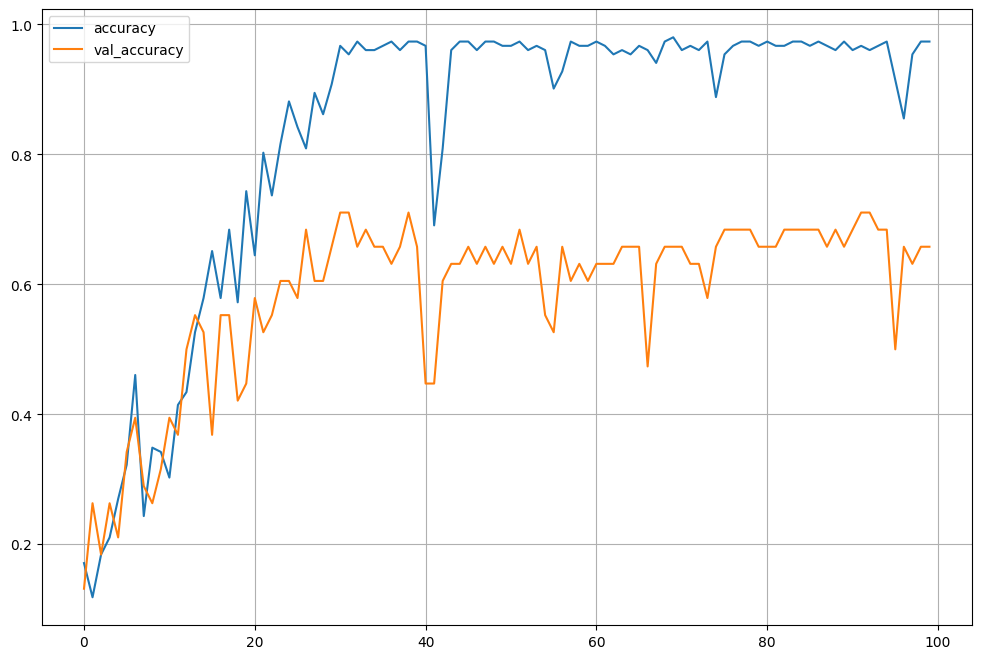

In [47]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()


In [48]:
from tensorflow.keras.models import load_model
model = load_model('c:/workspace/Data/result/food_best2.h5')
scores = model.evaluate(x_tr, y_tr, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(x_ts, y_ts, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용



6/6 [==============================] - 0s 12ms/step - loss: 0.3488 - accuracy: 0.9158
[0.34882932901382446, 0.9157894849777222]
accuracy: 91.58%
2/2 [==============================] - 0s 8ms/step - loss: 0.9835 - accuracy: 0.6875
[0.9835435748100281, 0.6875]
accuracy: 68.75%


In [49]:
pred=model.predict(x_ts)
np.argmax(pred,axis=1)


2/2 [==============================] - 0s 10ms/step


array([3, 1, 3, 0, 0, 4, 1, 2, 0, 5, 4, 3, 4, 3, 4, 0, 2, 3, 0, 0, 3, 5,
       0, 1, 5, 0, 1, 1, 0, 5, 1, 3, 3, 1, 5, 4, 4, 0, 2, 2, 1, 4, 1, 0,
       0, 5, 3, 3], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_backup, np.argmax(pred,axis=1)))


              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.78      0.88      0.82         8
           2       0.75      0.38      0.50         8
           3       0.70      0.88      0.78         8
           4       0.57      0.67      0.62         6
           5       0.83      0.62      0.71         8

    accuracy                           0.69        48
   macro avg       0.70      0.69      0.68        48
weighted avg       0.70      0.69      0.68        48

